<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/classification_model_shearing_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
!unrar x /content/dataset_2.rar /content/
print(os.listdir("/content/dataset_2"))


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dataset_2.rar


Would you like to replace the existing file /content/dataset_2/test/caries_media/caries-102-_png_tooth_1_png.rf.6f66d02aa32872d4f617f8b8c54f0cc0.jpg
 28270 bytes, modified on 2025-03-12 17:21
with a new one
 28270 bytes, modified on 2025-03-12 17:21

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/dataset_2/test/caries_media/caries-102-_png_tooth_1_png.rf.6f66d02aa32872d4f617f8b8c54f0cc0.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-149-_png_tooth_2_png.rf.03bc01825ae3bf723af834324e2f66e6.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-184-_png_tooth_1_png.rf.eac890739131153c768a9dfcc24b1bef.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-207-_png_tooth_0_png.rf.4ba2e07178b2b4d8288b2e28d4642854.jpg       0%  OK 
Extracting  /content/da

In [3]:
!pip install ultralytics albumentations

from ultralytics import YOLO
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os

# 1️⃣ Load model YOLOv8 untuk klasifikasi
model = YOLO('yolov8n-cls.pt')  # Menggunakan model YOLOv8 untuk klasifikasi

# 2️⃣ Definisi augmentasi shearing menggunakan Albumentations
shearing_transform = A.Compose([
    A.Affine(shear=(-20, 20), p=1.0),  # Shearing dengan sudut antara -20° hingga 20°
    A.Normalize(mean=(0.5,), std=(0.5,)),  # Normalisasi
    ToTensorV2()
])

# 3️⃣ Fungsi untuk menerapkan augmentasi shearing pada gambar sebelum training
def augment_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    augmented = shearing_transform(image=image)  # Terapkan transformasi
    return augmented["image"]

# 4️⃣ Training model dengan augmentasi shearing
model.train(
    data="/content/dataset_2",  # Path ke dataset
    epochs=30,  # Jumlah epoch
    imgsz=640,  # Ukuran gambar input
    batch=16,  # Ukuran batch
    augment=True  # Tetap aktifkan augmentasi default dari YOLO
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

100%|██████████| 5.31M/5.31M [00:00<00:00, 87.0MB/s]


Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset_2, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset_2/train... 1292 images, 0 corrupt: 100%|██████████| 1292/1292 [00:00<00:00, 1463.15it/s]

train: New cache created: /content/dataset_2/train.cache



val: Scanning /content/dataset_2/val... 161 images, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 1051.47it/s]

val: New cache created: /content/dataset_2/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30       1.7G      1.454         16        640:   6%|▌         | 5/81 [00:02<00:24,  3.13it/s]

       1/30       1.7G      1.469         16        640:   9%|▊         | 7/81 [00:03<00:34,  2.14it/s]
  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 3.06MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all      0.658          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all      0.609          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all      0.559          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all      0.646          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]

                   all      0.658          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all      0.677          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30      2.09G     0.8582         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]

                   all      0.658          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30      2.09G     0.8419         12        640: 100%|██████████| 81/81 [00:43<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all      0.646          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30      2.09G     0.8296         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30      2.09G     0.8296         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all      0.578          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30      2.09G     0.8079         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all      0.646          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30      2.09G     0.7839         12        640: 100%|██████████| 81/81 [00:45<00:00,  1.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30      2.09G     0.7742         12        640: 100%|██████████| 81/81 [00:43<00:00,  1.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30      2.09G     0.7406         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]

                   all      0.689          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30      2.09G     0.7421         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all      0.677          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30      2.09G     0.7158         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30      2.09G     0.7107         12        640: 100%|██████████| 81/81 [00:44<00:00,  1.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30      2.09G     0.6961         12        640: 100%|██████████| 81/81 [00:43<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30      2.09G     0.6787         12        640: 100%|██████████| 81/81 [00:40<00:00,  1.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all      0.677          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30      2.09G     0.6609         12        640: 100%|██████████| 81/81 [00:42<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30      2.09G     0.6466         12        640: 100%|██████████| 81/81 [00:41<00:00,  1.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all      0.696          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30      2.09G     0.6109         12        640: 100%|██████████| 81/81 [00:41<00:00,  1.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30      2.09G     0.6183         12        640: 100%|██████████| 81/81 [00:41<00:00,  1.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all      0.696          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30      2.09G     0.5949         12        640: 100%|██████████| 81/81 [00:41<00:00,  1.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30      2.09G      0.584         12        640: 100%|██████████| 81/81 [00:42<00:00,  1.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

                   all      0.689          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30      2.09G     0.5813         12        640: 100%|██████████| 81/81 [00:42<00:00,  1.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30      2.09G     0.5487         12        640: 100%|██████████| 81/81 [00:41<00:00,  1.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all      0.708          1



30 epochs completed in 0.394 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset_2/train... found 1292 images in 4 classes ✅ 
val: /content/dataset_2/val... found 161 images in 4 classes ✅ 
test: /content/dataset_2/test... found 162 images in 4 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  17%|█▋        | 1/6 [00:00<00:00,  6.65it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 3/6 [00:01<00:01,  1.53it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  83%|████████▎ | 5/6 [00:03<00:00,  1.60it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]


                   all      0.708          1
Speed: 0.6ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0c94197f50>
curves: []
curves_results: []
fitness: 0.8540372550487518
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7080745100975037, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8540372550487518}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.6398368757755007, 'inference': 1.7052577763990586, 'loss': 0.0006425838511395962, 'postprocess': 0.00099779503137182}
task: 'classify'
top1: 0.7080745100975037
top5: 1.0

Jumlah gambar ditemukan: 161
['/content/dataset_2/val/caries_profunda/caries-91-_png_tooth_1_png.rf.1ac267f9b4233cfce060534255dc6a97.jpg', '/content/dataset_2/val/caries_profunda/caries-280-_png_tooth_0_png.rf.2373166f4efc0aaf3689e67fbe8a1f29.jpg', '/content/dataset_2/val/caries_profunda/caries-10-_png_tooth_1_png.rf.defc472f36160ca98229ec54ffd92a1b.jpg', '/content/dataset_2/val/caries_profunda/Frame-401_jpg_tooth_0_png.rf.dc2b6a2271c8f265c13abf1c4f84832e.jpg', '/content/dataset_2/val/caries_profunda/Frame-242_jpg_tooth_1_png.rf.aff7a6380a808719e68fa8f410d90258.jpg']
Jumlah gambar yang dipilih: 4
['/content/dataset_2/val/caries_media/caries-547-_png_tooth_0_png.rf.663c865edbd52cda7ee9ad286a10adcb.jpg', '/content/dataset_2/val/caries_media/Frame-259_jpg_tooth_0_png.rf.62ab1a1ee9093896ed9f7487102a2f9c.jpg', '/content/dataset_2/val/noncaries/healthy-130-_png_tooth_2_png.rf.eee6866bc465e2f488e6043891d60419.jpg', '/content/dataset_2/val/noncaries/healthy-96-_png_tooth_0_png.rf.29b81edaa3466

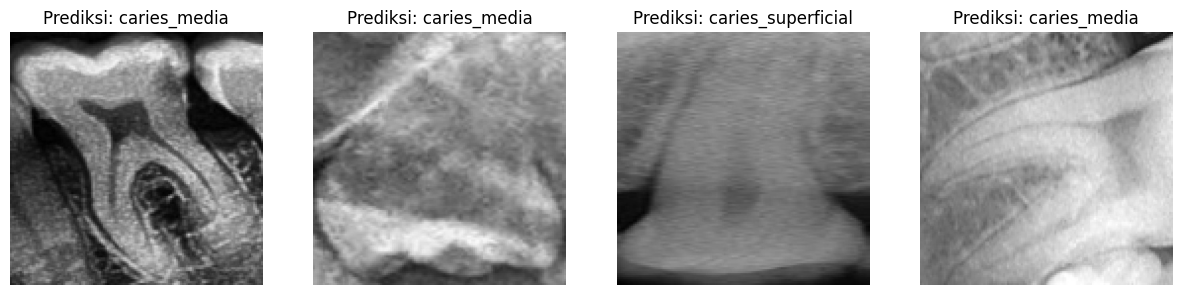

In [5]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from glob import glob
import random


# Ambil semua gambar dari folder validasi
image_paths = glob("/content/dataset_2/val/*/*.jpg")  # Sesuaikan ekstensi jika perlu

# Tampilkan jumlah gambar yang ditemukan
print(f"Jumlah gambar ditemukan: {len(image_paths)}")

# Tampilkan beberapa contoh path gambar
print(image_paths[:5])

# Ambil minimal 4 atau jumlah gambar yang tersedia
sample_images = random.sample(image_paths, min(4, len(image_paths)))

print(f"Jumlah gambar yang dipilih: {len(sample_images)}")
print(sample_images)

# Buat plot untuk menampilkan gambar dan prediksi
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))

for ax, img_path in zip(axes, sample_images):
    # Baca gambar
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk ditampilkan

    # Prediksi
    results = model(img_path)  # Jalankan model pada gambar
    predicted_class = results[0].probs.top1  # Ambil kelas dengan probabilitas tertinggi
    class_names = model.names  # Ambil daftar nama kelas

    # Tampilkan gambar dengan prediksi
    ax.imshow(img)
    ax.set_title(f"Prediksi: {class_names[predicted_class]}")
    ax.axis("off")

plt.show()

In [6]:
import shutil

folder_path = "/content/runs"
zip_path = "/content/runs.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>